In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Factor Analysis

In [2]:
data = pd.read_excel('../data/survey.xlsx')

In [3]:
data.head()

,Timestamp,What is your age group?,What is your gender?,What is your primary occupation?,What is your monthly household income (INR)?,Which best describes your area of residence?,How often do you consume roti?,What are your primary sources of protein? (Select all that apply),How do you usually prepare or purchase roti? (Select all that apply),Have you ever purchased ready-to-cook or packaged rotis?,...,How likely are you to rely on online reviews/influencers or digital recommendations when choosing a new food product?,Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?,"If you are willing to try such a product, what would be your ideal pack size?",We’d love to hear your thoughts! Any additional comments or suggestions about protein-enhanced rotis?\nYou can also contact us at : t3b4grp@iima.ac.in,How frequently do you go to the gym or engage in regular exercise?,How sensitive are you to the shelf life of packaged food products?,How important is the shelf life of packaged food products for you?,How sensitive are you to preservatives in packaged food?,Do you prefer longer shelf life for packaged foods?,Column 34
0,2025-02-17 20:22:54.167,25–34,Male,Student,"More than 1,00,000",Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Eggs",Make it fresh at home,No,...,2,Yes,Pack of 4 rotis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-17 20:33:28.951,18–24,Male,Student,Prefer not to say,Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Lentils & Pulses...",Make it fresh at home,No,...,1,No,Pack of 4 rotis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-17 20:51:11.003,25–34,Male,Working professional,"More than 1,00,000",Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Lentils & Pulses",Make it fresh at home,No,...,4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-17 20:57:32.880,25–34,Male,Student,"50,000-1,00,000",Urban,2–3 times a week 3,"Eggs, Meat & Poultry, Protein Bars/Supplements","Make it fresh at home, Buy ready-to-eat packag...",Yes,...,3,Yes,Pack of 6 rotis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-17 21:55:58.597,25–34,Male,Student,Prefer not to say,Semi-urban,4–6 times a week,"Eggs, Meat & Poultry",Buy from a restaurant,Yes,...,5,Yes,Pack of 4 rotis,NaN,Once a week,I prefer products with a longer shelf life but...,NaN,NaN,NaN,NaN


In [4]:
list(data.columns).index('Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Taste & Texture]')

13

In [5]:
list(data[::].columns[13:19])

['Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Taste & Texture]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Nutritional value (including protein content)]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Shelf-life]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Price]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Packaging

In [6]:
data.iloc[:, 13:20]

,"Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Taste & Texture]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Nutritional value (including protein content)]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Shelf-life]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Price]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Packaging design]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Brand trust]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Convenience]"
0,Somewhat Important,Neutral,Somewhat Important,Neutral,Not important,Less Important,Somewhat Important
1,Not important,Not important,Not important,Not important,Not important,Not important,Not important
2,NaN,Somewhat Important,Neutral,Neutral,Neutral,Somewhat Important,Somewhat Important
3,NaN,Very Important,Somewhat Important,Neutral,Very Important,Neutral,Neutral
4,NaN,Not important,Less Important,Neutral,Neutral,Neutral,Very Important
...,...,...,...,...,...,...,...
107,NaN,Very Important,Very Important,Very Important,Somewhat Important,Somewhat Important,Somewhat Important
108,NaN,Very Important,Somewhat Important,Neutral,Less Important,Less Important,Somewhat Important
109,NaN,Neutral,Somewhat Important,Somewhat Important,Less Important,Very Important,Somewhat Important
110,NaN,Very Important,Somewhat Important,Somewhat Important,Neutral,Somewhat Important,Somewhat Important


In [7]:
df = data.iloc[:, 14:20]
df.rename(columns = dict(zip(list(data[::].columns[14:20]), ['Nutritional value', 'Shelf-life', 'Price', 'Packaging design',
       'Brand trust', 'Convenience'])) , inplace = True)

In [8]:
df.head()

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,Neutral,Somewhat Important,Neutral,Not important,Less Important,Somewhat Important
1,Not important,Not important,Not important,Not important,Not important,Not important
2,Somewhat Important,Neutral,Neutral,Neutral,Somewhat Important,Somewhat Important
3,Very Important,Somewhat Important,Neutral,Very Important,Neutral,Neutral
4,Not important,Less Important,Neutral,Neutral,Neutral,Very Important


In [9]:
len(df)

112

In [10]:
# # Load the data
# df = pd.read_excel('../data/factor_data.xlsx')
# df = df.dropna()    
# len(df)

In [11]:
# df.columns

In [12]:
df.head()

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,Neutral,Somewhat Important,Neutral,Not important,Less Important,Somewhat Important
1,Not important,Not important,Not important,Not important,Not important,Not important
2,Somewhat Important,Neutral,Neutral,Neutral,Somewhat Important,Somewhat Important
3,Very Important,Somewhat Important,Neutral,Very Important,Neutral,Neutral
4,Not important,Less Important,Neutral,Neutral,Neutral,Very Important


In [13]:
# Define the mapping
mapping = {
    'Not important': 1,
    'Less Important': 2,
    'Neutral': 3,
    'Somewhat Important': 4,
    'Very Important': 5
}

# Apply the mapping to the dataframe
factors = df.replace(mapping)
factors.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_25788\1701761953.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  factors = df.replace(mapping)


,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,3,4,3,1,2,4
1,1,1,1,1,1,1
2,4,3,3,3,4,4
3,5,4,3,5,3,3
4,1,2,3,3,3,5


In [14]:
# Calculate the correlation matrix
correlation_matrix = factors.corr()

# Plot the heatmap using Plotly
fig = px.imshow(correlation_matrix, 
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis')

fig.update_layout(title='Factor Analysis-Correlation Matrix Heatmap')
fig.show()

In [15]:
correlation_matrix

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
Nutritional value,1.000000,0.484111,0.336580,0.209671,0.525957,0.201327
Shelf-life,0.484111,1.000000,0.627126,0.211179,0.497577,0.415672
Price,0.336580,0.627126,1.000000,0.078632,0.531110,0.492729
Packaging design,0.209671,0.211179,0.078632,1.000000,0.289638,0.176582
Brand trust,0.525957,0.497577,0.531110,0.289638,1.000000,0.463708
Convenience,0.201327,0.415672,0.492729,0.176582,0.463708,1.000000


In [16]:
import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(factors)

In [17]:
kmo_model

0.7610091991824979

In [18]:
kmo_vars

array([0.73342426, 0.76789394, 0.73744723, 0.70511959, 0.77574191,
       0.81391991])

In [19]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(factors)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  197.63505321043615
p value :  6.42107375270824e-34


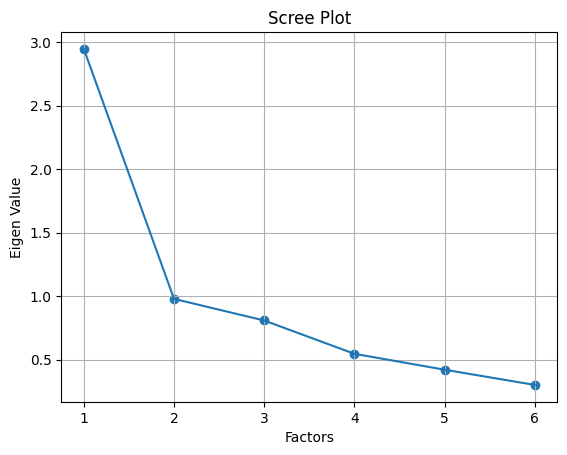

In [20]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,method='principal',impute = "drop",n_factors=factors.shape[1])
fa.fit(factors)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,factors.shape[1]+1),ev)
plt.plot(range(1,factors.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

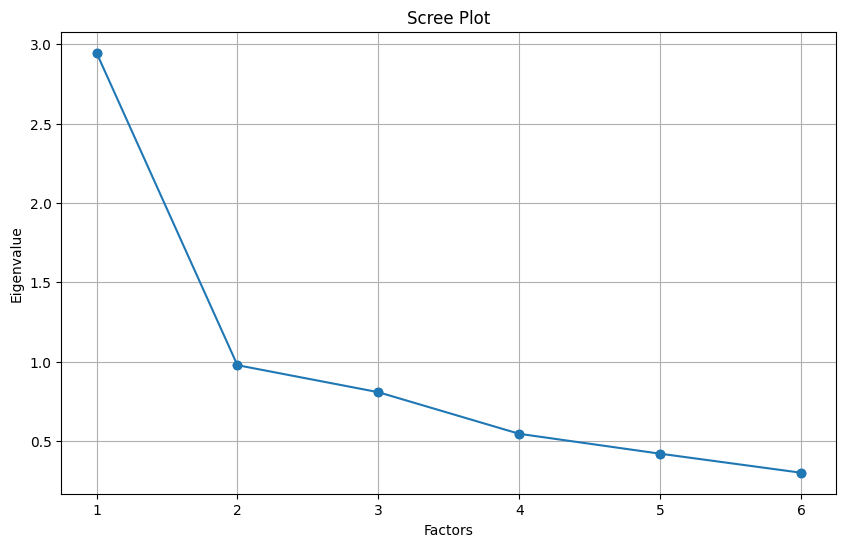

In [21]:
from factor_analyzer import FactorAnalyzer

import matplotlib.pyplot as plt

# Initialize the FactorAnalyzer with PCA method
fa = FactorAnalyzer(rotation=None, method='principal', n_factors=factors.shape[1])
fa.fit(factors)

# Get eigenvalues
ev, _ = fa.get_eigenvalues()

# Create scree plot
plt.figure(figsize=(10, 6))
plt.scatter(range(1, factors.shape[1] + 1), ev)
plt.plot(range(1, factors.shape[1] + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [22]:
FactorAnalyzer?

Init signature:
FactorAnalyzer(
    n_factors=3,
    rotation='promax',
    method='minres',
    use_smc=True,
    is_corr_matrix=False,
    bounds=(0.005, 1),
    impute='median',
    svd_method='randomized',
    rotation_kwargs=None,
)
Docstring:     
The main exploratory factor analysis class.

This class:
    (1) Fits a factor analysis model using minres, maximum likelihood,
        or principal factor extraction and returns the loading matrix
    (2) Optionally performs a rotation, with method including:

        (a) varimax (orthogonal rotation)
        (b) promax (oblique rotation)
        (c) oblimin (oblique rotation)
        (d) oblimax (orthogonal rotation)
        (e) quartimin (oblique rotation)
        (f) quartimax (orthogonal rotation)
        (g) equamax (orthogonal rotation)

Parameters
----------
n_factors : int, optional
    The number of factors to select.
    Defaults to 3.
rotation : str, optional
    The type of rotation to perform after fitting the factor analy

In [23]:
ev

array([2.94634806, 0.97824581, 0.80806205, 0.54590271, 0.42063233,
       0.30080905])

In [24]:
#rotated_component_matrix
fa = FactorAnalyzer(n_factors=2,rotation='varimax')
fa.fit(factors)
print(pd.DataFrame(fa.loadings_,index=factors.columns))

                          0         1
Nutritional value  0.265486  0.585582
Shelf-life         0.570498  0.459392
Price              0.991823  0.119219
Packaging design   0.050044  0.386774
Brand trust        0.448667  0.667737
Convenience        0.469383  0.295907


In [25]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1
Variance          1.803790  1.251188
Proportional Var  0.300632  0.208531
Cumulative Var    0.300632  0.509163


In [26]:
print(pd.DataFrame(fa.get_communalities(),index=factors.columns,columns=['Communalities']))

                   Communalities
Nutritional value       0.413389
Shelf-life              0.536509
Price                   0.997926
Packaging design        0.152099
Brand trust             0.647174
Convenience             0.307881


In [27]:
rotated_component_matrix = pd.DataFrame(fa.loadings_, index=factors.columns)
print(rotated_component_matrix)

                          0         1
Nutritional value  0.265486  0.585582
Shelf-life         0.570498  0.459392
Price              0.991823  0.119219
Packaging design   0.050044  0.386774
Brand trust        0.448667  0.667737
Convenience        0.469383  0.295907


### PCA

In [28]:
list(data.columns).index('Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?')

28

In [29]:
interest = data.iloc[::, 28]

In [30]:
mapping = {
    'Yes': 1,
    'No': 0,
    'Maybe': 0.5
}

# Apply the mapping to the dataframe
interest = interest.replace(mapping)
interest.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_25788\181251922.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?, dtype: float64

In [31]:
y = interest.values

In [32]:
factors

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,3,4,3,1,2,4
1,1,1,1,1,1,1
2,4,3,3,3,4,4
3,5,4,3,5,3,3
4,1,2,3,3,3,5
...,...,...,...,...,...,...
107,5,5,5,4,4,4
108,5,4,3,2,2,4
109,3,4,4,2,5,4
110,5,4,4,3,4,4


In [33]:
from sklearn.decomposition import PCA
# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(factors)

In [34]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[3.83844571 1.26936548]


In [35]:
pca.explained_variance_ratio_

array([0.48817961, 0.16143991])

In [36]:
fa._fit_principal(factors.values)

array([[-0.66453463,  0.23747019],
       [-0.80734877, -0.11470813],
       [-0.78062871, -0.38038193],
       [-0.37216734,  0.83570776],
       [-0.81310174,  0.096795  ],
       [-0.6662624 , -0.23712574]])

### Regression

In [37]:
X = reduced_data
Y = y

In [38]:
import statsmodels.api as sm
from scipy import stats

x = sm.add_constant(X)
model = sm.OLS(Y, x)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.540
Date:                Sun, 02 Mar 2025   Prob (F-statistic):             0.0128
Time:                        14:12:10   Log-Likelihood:                -29.929
No. Observations:                 112   AIC:                             65.86
Df Residuals:                     109   BIC:                             74.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8080      0.030     26.689      0.0

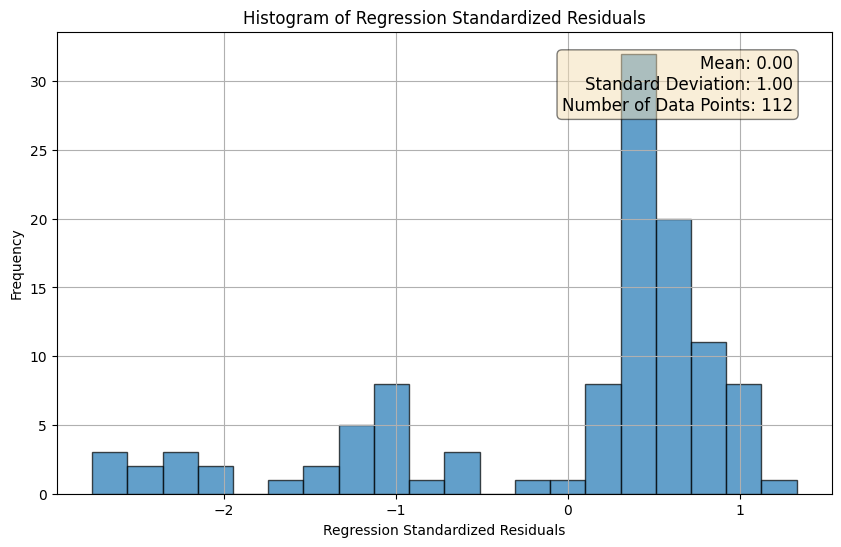

In [39]:
# Calculate the standardized residuals
standardized_residuals = (model.resid - np.mean(model.resid)) / np.std(model.resid)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(standardized_residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Regression Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Regression Standardized Residuals')

# Calculate statistics
mean_resid = np.mean(standardized_residuals)
std_resid = np.std(standardized_residuals)
num_data_points = len(standardized_residuals)

# Add text box with statistics
textstr = '\n'.join((
    f'Mean: {mean_resid:.2f}',
    f'Standard Deviation: {std_resid:.2f}',
    f'Number of Data Points: {num_data_points}'
))

# Place the text box in the plot
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='right', bbox=props)

plt.grid(True)
plt.show()

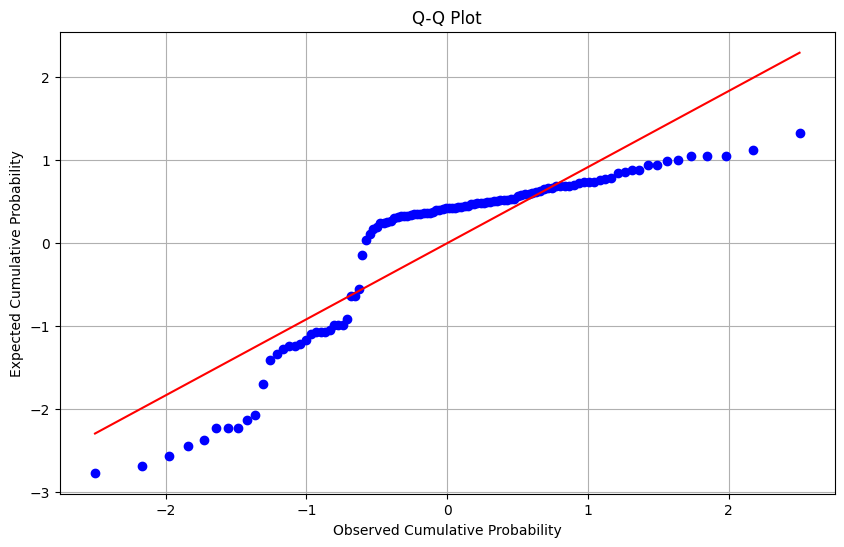

In [40]:
import scipy.stats as stats

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=ax)
ax.set_title('Q-Q Plot')
ax.set_xlabel('Observed Cumulative Probability')
ax.set_ylabel('Expected Cumulative Probability')
plt.grid(True)
plt.show()

### Data cleaning

In [41]:
data.columns

Index(['Timestamp', 'What is your age group?', 'What is your gender?  ',
       'What is your primary occupation?',
       'What is your monthly household income (INR)?',
       '  Which best describes your area of residence?  ',
       'How often do you consume roti?',
       'What are your primary sources of protein? (Select all that apply)',
       'How do you usually prepare or purchase roti? (Select all that apply)',
       'Have you ever purchased ready-to-cook or packaged rotis?',
       'How often do you purchase ready-to-cook or packaged rotis? (If your response is Yes/Maybe for previous question)',
       'How actively do you ensure enough protein is in your daily diet?',
       'Which of the following protein-enhanced products have you heard of before? (Select all that apply)',
       'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Taste & Textur

In [42]:
df = data.copy()


In [43]:
list(df[::].columns[14:20])

['Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Nutritional value (including protein content)]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Shelf-life]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Price]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Packaging design]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Brand tr

In [44]:


df.rename(columns = dict(zip(list(df[::].columns[14:20]), ['Nutritional value', 'Shelf-life', 'Price', 'Packaging design',
       'Brand trust', 'Convenience'])) , inplace = True)


# drop the columns
df.drop(['Timestamp','Column 34'], axis=1, inplace=True)
df.drop('Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Taste & Texture]', axis=1, inplace=True)
df.drop('We’d love to hear your thoughts! Any additional comments or suggestions about protein-enhanced rotis?\nYou can also contact us at :  t3b4grp@iima.ac.in', axis=1, inplace=True)

In [45]:
df.rename(columns = dict(zip(list(df[::].columns[0:13]), ['Age', 'Gender', 'Occupation', 'Income', 'Location', 'Consumption frequency',
                                                                              'Protein Source', 'Buying behaviour', 'is_RTC_customer',
                                                                              'RTC_customer_frequency', 'protein_concious','protein_products_awareness'])) , inplace = True)

In [46]:
list(df.columns).index('What concerns might prevent you from purchasing protein rotis? (Select all that apply)')

18

In [47]:
list(df.columns).index('Do you prefer longer shelf life for packaged foods?')

32

In [48]:
len(['Concerns', 'WTP', 'Channels', 'Channel_selection_driver', 'RTC_current_satisfaction_score', 'challenges', 'information_sources', 'digital_rec_preference', 'interest', 
 'packet_size_preference', 'gym_frequency', 'shelf_life_sensitivity', 'shelf_life_importance' ,'preservative_sensitivity', 'shelf_life_preference'])

15

In [49]:
(list(df[::].columns[18:33]))

['What concerns might prevent you from purchasing protein rotis? (Select all that apply)',
 'At what price point would you consider a pack of 4 protein rotis to be fair?',
 'Which of the following channels do you usually use to purchase ready-to-cook or packaged food items? (Select all that apply)',
 'What are your reasons for choosing your preferred purchase channel?(Select all that apply)',
 'How satisfied are you with the current ready-to-cook food options available in the market?',
 'What challenges, if any, have you experienced when purchasing ready-to-cook food products? (Select all that apply)',
 'How do you usually learn about new food products? (Select all that apply)',
 'How likely are you to rely on online reviews/influencers or digital recommendations when choosing a new food product?',
 'Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?',
 'If you are willing to try such a product, what would be your ideal pack size?',

In [50]:
len(list(df[::].columns[18:33]))

15

In [51]:
list(df[::].columns[18:33])

['What concerns might prevent you from purchasing protein rotis? (Select all that apply)',
 'At what price point would you consider a pack of 4 protein rotis to be fair?',
 'Which of the following channels do you usually use to purchase ready-to-cook or packaged food items? (Select all that apply)',
 'What are your reasons for choosing your preferred purchase channel?(Select all that apply)',
 'How satisfied are you with the current ready-to-cook food options available in the market?',
 'What challenges, if any, have you experienced when purchasing ready-to-cook food products? (Select all that apply)',
 'How do you usually learn about new food products? (Select all that apply)',
 'How likely are you to rely on online reviews/influencers or digital recommendations when choosing a new food product?',
 'Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?',
 'If you are willing to try such a product, what would be your ideal pack size?',

In [52]:
df['How sensitive are you to preservatives in packaged food?'].isna().sum()

9

In [53]:
df.rename(columns = dict(zip(list(df[::].columns[18:33]), ['Concerns', 'WTP', 'Channels', 'Channel_selection_driver', 'RTC_current_satisfaction_score', 
                                                                               'challenges', 'information_sources', 'digital_rec_preference', 'interest', 
                                                                               'packet_size_preference', 'gym_frequency', 'shelf_life_sensitivity', 'shelf_life_importance',
                                                                               'preservative_sensitivity', 'shelf_life_preference'])) , inplace = True)

In [54]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Income', 'Location',
       'Consumption frequency', 'Protein Source', 'Buying behaviour',
       'is_RTC_customer', 'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness', 'Nutritional value', 'Shelf-life',
       'Price', 'Packaging design', 'Brand trust', 'Convenience', 'Concerns',
       'WTP', 'Channels', 'Channel_selection_driver',
       'RTC_current_satisfaction_score', 'challenges', 'information_sources',
       'digital_rec_preference', 'interest', 'packet_size_preference',
       'gym_frequency', 'shelf_life_sensitivity', 'shelf_life_importance',
       'preservative_sensitivity', 'shelf_life_preference'],
      dtype='object')

In [55]:
df.head()

,Age,Gender,Occupation,Income,Location,Consumption frequency,Protein Source,Buying behaviour,is_RTC_customer,RTC_customer_frequency,...,challenges,information_sources,digital_rec_preference,interest,packet_size_preference,gym_frequency,shelf_life_sensitivity,shelf_life_importance,preservative_sensitivity,shelf_life_preference
0,25–34,Male,Student,"More than 1,00,000",Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Eggs",Make it fresh at home,No,Never,...,"Short shelf-life, High price, Lack of variety","Social media, Word of mouth, Online reviews",2,Yes,Pack of 4 rotis,NaN,NaN,NaN,NaN,NaN
1,18–24,Male,Student,Prefer not to say,Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Lentils & Pulses...",Make it fresh at home,No,Never,...,"Short shelf-life, Inconsistent quality, High p...","TV or radio commercials, In-store promotions, ...",1,No,Pack of 4 rotis,NaN,NaN,NaN,NaN,NaN
2,25–34,Male,Working professional,"More than 1,00,000",Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Lentils & Pulses",Make it fresh at home,No,Never,...,"Short shelf-life, Contents of preservative",Social media,4,No,NaN,NaN,NaN,NaN,NaN,NaN
3,25–34,Male,Student,"50,000-1,00,000",Urban,2–3 times a week 3,"Eggs, Meat & Poultry, Protein Bars/Supplements","Make it fresh at home, Buy ready-to-eat packag...",Yes,Sometimes,...,"Limited availability, Unclear nutritional info...","Social media, TV or radio commercials, Word of...",3,Yes,Pack of 6 rotis,NaN,NaN,NaN,NaN,NaN
4,25–34,Male,Student,Prefer not to say,Semi-urban,4–6 times a week,"Eggs, Meat & Poultry",Buy from a restaurant,Yes,Often,...,"Inconsistent quality, High price, Limited avai...",In-store promotions,5,Yes,Pack of 4 rotis,Once a week,I prefer products with a longer shelf life but...,NaN,NaN,NaN


In [ ]:
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(df, title="Data Cluster Profile Report", explorative=True)

# Save the report as an HTML file
profile.to_file("eda.html")

In [57]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Age                                 0.000000
Gender                              0.000000
Occupation                          0.000000
Income                              0.000000
Location                            2.678571
Consumption frequency               0.000000
Protein Source                      0.000000
Buying behaviour                    0.000000
is_RTC_customer                     0.000000
RTC_customer_frequency              8.035714
protein_concious                    0.000000
protein_products_awareness          0.000000
Nutritional value                   0.000000
Shelf-life                          0.000000
Price                               0.000000
Packaging design                    0.000000
Brand trust                         0.000000
Convenience                         0.000000
Concerns                            2.678571
WTP                                 0.000000
Channels                            0.000000
Channel_selection_driver            0.000000
RTC_curren

In [58]:
# Drop columns with more than 90% missing values
threshold = 0.90
df = df.loc[:, df.isnull().mean() < threshold]

In [59]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Age                               0.000000
Gender                            0.000000
Occupation                        0.000000
Income                            0.000000
Location                          2.678571
Consumption frequency             0.000000
Protein Source                    0.000000
Buying behaviour                  0.000000
is_RTC_customer                   0.000000
RTC_customer_frequency            8.035714
protein_concious                  0.000000
protein_products_awareness        0.000000
Nutritional value                 0.000000
Shelf-life                        0.000000
Price                             0.000000
Packaging design                  0.000000
Brand trust                       0.000000
Convenience                       0.000000
Concerns                          2.678571
WTP                               0.000000
Channels                          0.000000
Channel_selection_driver          0.000000
RTC_current_satisfaction_score    0.000000
challenges 

In [60]:
df['WTP'][1].replace('₹', '').split(' ')[1]

'40'

In [61]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Income', 'Location',
       'Consumption frequency', 'Protein Source', 'Buying behaviour',
       'is_RTC_customer', 'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness', 'Nutritional value', 'Shelf-life',
       'Price', 'Packaging design', 'Brand trust', 'Convenience', 'Concerns',
       'WTP', 'Channels', 'Channel_selection_driver',
       'RTC_current_satisfaction_score', 'challenges', 'information_sources',
       'digital_rec_preference', 'interest', 'packet_size_preference',
       'gym_frequency', 'preservative_sensitivity', 'shelf_life_preference'],
      dtype='object')

In [62]:
len(df.describe(include='O').columns)

28

In [63]:
df['Age'].unique()

array(['25–34', '18–24', '50+', '35–50'], dtype=object)

In [64]:
age_mapping = {
    "18–24": 1, "25–34": 2, "35–50": 3, "50+": 4
}
df['Age'] = df['Age'].map(age_mapping)

In [65]:
df['Age'].unique()

array([2, 1, 4, 3], dtype=int64)

In [66]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [67]:
df.describe(include='O').columns

Index(['Gender', 'Occupation', 'Income', 'Location', 'Consumption frequency',
       'Protein Source', 'Buying behaviour', 'is_RTC_customer',
       'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness', 'Nutritional value', 'Shelf-life',
       'Price', 'Packaging design', 'Brand trust', 'Convenience', 'Concerns',
       'WTP', 'Channels', 'Channel_selection_driver', 'challenges',
       'information_sources', 'interest', 'packet_size_preference',
       'gym_frequency', 'shelf_life_preference'],
      dtype='object')

In [68]:
df['Buying behaviour'] = df['Buying behaviour'].apply(lambda x: x.split(', '))

In [69]:
dummies = df['Buying behaviour'].str.get_dummies(sep=', ')

In [70]:
is_rtc_cust = dummies['[\'Buy ready-to-cook packaged rotis\''].values + dummies['\'Buy ready-to-eat packaged rotis\''].values

In [71]:
is_rtc_cust = [min(x, 1) for x in is_rtc_cust]

In [72]:
is_making_at_home = dummies['[\'Make it fresh at home\''].values + dummies['[\'Make it fresh at home\']'].values
is_making_at_home = [min(x, 1) for x in is_making_at_home]

In [73]:
df['is_rtc_cust'] = is_rtc_cust
df['is_making_at_home'] = is_making_at_home
df.drop('Buying behaviour', axis=1, inplace=True)

In [74]:
df.describe(include='O').columns

Index(['Gender', 'Occupation', 'Income', 'Location', 'Consumption frequency',
       'Protein Source', 'is_RTC_customer', 'RTC_customer_frequency',
       'protein_concious', 'protein_products_awareness', 'Nutritional value',
       'Shelf-life', 'Price', 'Packaging design', 'Brand trust', 'Convenience',
       'Concerns', 'WTP', 'Channels', 'Channel_selection_driver', 'challenges',
       'information_sources', 'interest', 'packet_size_preference',
       'gym_frequency', 'shelf_life_preference'],
      dtype='object')

In [75]:
nominal_columns = ['Gender', 'Occupation', 'Location']
for col in nominal_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [76]:
df.describe(include='O').columns

Index(['Income', 'Consumption frequency', 'Protein Source', 'is_RTC_customer',
       'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness', 'Nutritional value', 'Shelf-life',
       'Price', 'Packaging design', 'Brand trust', 'Convenience', 'Concerns',
       'WTP', 'Channels', 'Channel_selection_driver', 'challenges',
       'information_sources', 'interest', 'packet_size_preference',
       'gym_frequency', 'shelf_life_preference'],
      dtype='object')

In [77]:
df['Income'].unique()

array(['More than 1,00,000', 'Prefer not to say', '50,000-1,00,000',
       '25,000-50,000', 'Below 25,000'], dtype=object)

In [78]:
income_mapping = {
    'More than 1,00,000': 4, '50,000-1,00,000': 3, "25,000-50,000": 2, "Below 25,000": 1, "Prefer not to say": 2.5
}
df['Income'] = df['Income'].map(income_mapping)

In [79]:
df['is_RTC_customer'] = df['is_RTC_customer'].map({"Yes": 1, "No": 0, "Maybe": 0.5})

In [80]:
frequency_mapping = {
    "Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3, "Always": 4,
    "Daily": 5, "4-6 times a week": 4, "2-3 times a week": 3, "Once a week": 2
}

In [81]:
df['RTC_customer_frequency'].unique()

array(['Never', 'Sometimes', 'Often', 'Rarely', nan, 'Always'],
      dtype=object)

In [82]:
df['RTC_customer_frequency'] = df['RTC_customer_frequency'].map(frequency_mapping)

In [83]:
df['gym_frequency'].unique()

array([nan, 'Once a week', 'Daily', '4-6 times a week',
       '2-3 times a week', 'Never'], dtype=object)

In [84]:
df['Consumption frequency'].unique()

array(['Daily', '2–3 times a week 3', '4–6 times a week', 'Once a week',
       '2–3 times a week', 'Less than once a week'], dtype=object)

In [85]:
consumption_frequency_mapping = {  
    "Less than once a week": 0, "Once a week": 1, "2–3 times a week": 2, "2–3 times a week 3": 2, "4–6 times a week": 3,
    "Daily": 5}
df['Consumption frequency'] = df['Consumption frequency'].map(consumption_frequency_mapping)

In [86]:
frequency_mapping

{'Never': 0,
 'Rarely': 1,
 'Sometimes': 2,
 'Often': 3,
 'Always': 4,
 'Daily': 5,
 '4-6 times a week': 4,
 '2-3 times a week': 3,
 'Once a week': 2}

In [87]:
df['Consumption frequency'] 

0      5
1      5
2      5
3      2
4      3
      ..
107    5
108    5
109    1
110    5
111    3
Name: Consumption frequency, Length: 112, dtype: int64

In [88]:
df['gym_frequency'] = df['gym_frequency'].map(frequency_mapping)

In [89]:
# df['preservative_sensitivity'] = df['preservative_sensitivity'].map({"Yes": 1, "No": 0, "Maybe": 0.5})

In [90]:
df.describe(include='O').columns

Index(['Protein Source', 'protein_concious', 'protein_products_awareness',
       'Nutritional value', 'Shelf-life', 'Price', 'Packaging design',
       'Brand trust', 'Convenience', 'Concerns', 'WTP', 'Channels',
       'Channel_selection_driver', 'challenges', 'information_sources',
       'interest', 'packet_size_preference', 'shelf_life_preference'],
      dtype='object')

In [91]:
df['protein_concious'].unique()

array(['I assume my diet provides enough protein',
       'I try to include protein-rich foods but don’t track it',
       'I carefully track my protein intake, I assume my diet provides enough protein',
       'I don’t pay attention to protein intake',
       'I carefully track my protein intake'], dtype=object)

In [92]:
protein_mapping = {
    "I don’t pay attention to protein intake": 1, "I assume my diet provides enough protein": 2, "I try to include protein-rich foods but don’t track it": 3, "I carefully track my protein intake": 4,'I carefully track my protein intake, I assume my diet provides enough protein': 2.5
}

df['protein_concious'] = df['protein_concious'].map(protein_mapping)


In [93]:
df['protein_products_awareness'].unique()

array(['Protein bars, Protein shakes',
       'Protein bars, Protein shakes, High-protein bread/atta, High-protein cereals/snacks',
       'Protein bars, Protein shakes, High-protein cereals/snacks',
       'Protein bars, Protein shakes, High-protein bread/atta',
       'Protein bars, High-protein bread/atta, High-protein cereals/snacks',
       'None of the above', 'Protein shakes, High-protein bread/atta',
       'Protein shakes', 'Protein bars',
       'Protein bars, High-protein bread/atta',
       'Protein bars, High-protein cereals/snacks',
       'Protein shakes, High-protein cereals/snacks',
       'Protein bars, Protein shakes, High-protein bread/atta, High-protein cereals/snacks, Protein packed milk products',
       'High-protein cereals/snacks', 'Protein bars, Protein shakes, ',
       'High-protein bread/atta, High-protein cereals/snacks',
       'High-protein bread/atta'], dtype=object)

In [94]:
none_map = {'None of the abpve': 0}
df['protein_products_awareness'] = df['protein_products_awareness'].replace(none_map)

In [95]:
def convert_protein_products_awareness(wtp):
    if isinstance(wtp, str):
        return len(wtp.split(', '))

In [96]:
df['protein_products_awareness'] = df['protein_products_awareness'].apply(convert_protein_products_awareness)


In [97]:
df.describe(include='O').columns

Index(['Protein Source', 'Nutritional value', 'Shelf-life', 'Price',
       'Packaging design', 'Brand trust', 'Convenience', 'Concerns', 'WTP',
       'Channels', 'Channel_selection_driver', 'challenges',
       'information_sources', 'interest', 'packet_size_preference',
       'shelf_life_preference'],
      dtype='object')

In [98]:
df['Price'].unique()

price_sensitivity_mapping = {
    "Not important": 0, "Less Important": 1, "Neutral": 2, "Somewhat Important": 3, "Very Important": 4,
}

df['Price'] = df['Price'].map(price_sensitivity_mapping)

In [99]:
df['price_sensitivity'] = df['Price']
df.drop('Price', axis=1, inplace=True)

In [100]:
df.describe(include='O').columns

Index(['Protein Source', 'Nutritional value', 'Shelf-life', 'Packaging design',
       'Brand trust', 'Convenience', 'Concerns', 'WTP', 'Channels',
       'Channel_selection_driver', 'challenges', 'information_sources',
       'interest', 'packet_size_preference', 'shelf_life_preference'],
      dtype='object')

In [101]:
df['Brand trust'].unique()

array(['Less Important', 'Not important', 'Somewhat Important', 'Neutral',
       'Very Important'], dtype=object)

In [102]:
brand_sensitivity_mapping = {
    "Not important": 0, "Less Important": 1, "Neutral": 2, "Somewhat Important": 3, "Very Important": 4,
}

df['Brand trust'] = df['Brand trust'].map(brand_sensitivity_mapping)

df['brand_sensitivity'] = df['Brand trust']
df.drop('Brand trust', axis=1, inplace=True)

In [103]:
df['Channels'].unique() 

array(['Supermarkets, Quick-commerce apps (e.g., Blinkit, Zepto, Instamart)',
       'Local Store',
       'Local Store, Supermarkets, Quick-commerce apps (e.g., Blinkit, Zepto, Instamart)',
       'Local Store, Supermarkets, Quick-commerce apps (e.g., Blinkit, Zepto, Instamart), E-commerce websites (e.g., Amazon)',
       'Quick-commerce apps (e.g., Blinkit, Zepto, Instamart), E-commerce websites (e.g., Amazon)',
       'Quick-commerce apps (e.g., Blinkit, Zepto, Instamart)',
       'Local Store, Supermarkets',
       'Local Store, Quick-commerce apps (e.g., Blinkit, Zepto, Instamart)',
       'Supermarkets', "We don't use it",
       'Supermarkets, E-commerce websites (e.g., Amazon)',
       'Local Store, Supermarkets, E-commerce websites (e.g., Amazon)'],
      dtype=object)

In [104]:
l = []
for i in range(len(df)):
    if 'E-commerce websites (e.g., Amazon)' in df['Channels'][i] or 'Quick-commerce apps (e.g., Blinkit, Zepto, Instamart)' in df['Channels'][i]:
        l.append(1)
    else:
        l.append(0)

In [105]:
df['is_exposed_to_quick_e_comm_channels'] = l
df.drop('Channels', axis=1, inplace=True)

In [106]:
df['Nutritional value'].unique()    

array(['Neutral', 'Not important', 'Somewhat Important', 'Very Important',
       'Less Important'], dtype=object)

In [107]:
df['Nutritional value'] = df['Nutritional value'].map(brand_sensitivity_mapping)

df['nutrition_sensitivity'] = df['Nutritional value']
df.drop('Nutritional value', axis=1, inplace=True)

In [108]:
df['Packaging design'].unique()

array(['Not important', 'Neutral', 'Very Important', 'Less Important',
       'Somewhat Important'], dtype=object)

In [109]:
df['Packaging design'] = df['Packaging design'].map(brand_sensitivity_mapping)

df['packaging_sensitivity'] = df['Packaging design']
df.drop('Packaging design', axis=1, inplace=True)

In [110]:
df['Convenience'].unique()

array(['Somewhat Important', 'Not important', 'Neutral', 'Very Important',
       'Less Important'], dtype=object)

In [111]:
df['Convenience'] = df['Convenience'].map(brand_sensitivity_mapping)

df['convenience_sensitivity'] = df['Convenience']
df.drop('Convenience', axis=1, inplace=True)

In [112]:
df['shelf_life_preference'].unique()

array([nan, 'No', 'Maybe', 'Yes'], dtype=object)

In [113]:
df['shelf_life_preference'] = df['shelf_life_preference'].map({"Yes": 1, "No": 0, "Maybe": 0.5})

df['longer_shelf_pref'] = df['shelf_life_preference']
df.drop('shelf_life_preference', axis=1, inplace=True)

In [114]:
df.describe(include='O').columns

Index(['Protein Source', 'Shelf-life', 'Concerns', 'WTP',
       'Channel_selection_driver', 'challenges', 'information_sources',
       'interest', 'packet_size_preference'],
      dtype='object')

In [115]:
df['packet_size_preference'].unique()  

array(['Pack of 4 rotis', nan, 'Pack of 6 rotis', 'Pack of 8 rotis', 2,
       'Pack of 2 rotis', 10], dtype=object)

In [116]:
df['packet_size_preference'][0].split(' ')[2]

'4'

In [117]:
l = []
for i in range(len(df)):
    if isinstance(df['packet_size_preference'][i], str):
        l.append(int(df['packet_size_preference'][i].split(' ')[2]))
    else:
        l.append(df['packet_size_preference'][i])


In [118]:
set(l)

{2, 4, 6, 8, 10, nan}

In [119]:
df['packet_size_preference'] = l

In [120]:
l = []
for i in range(len(df)):
    if 'Trust in the vendor' in df['Channel_selection_driver'][i]:
        l.append(1)
    else:
        l.append(0)

In [121]:
df['is_vendor_trust_driver'] = l

In [122]:
l = []
for i in range(len(df)):
    if 'Speed of delivery' in df['Channel_selection_driver'][i]:
        l.append(1)
    else:
        l.append(0)

In [123]:
df['is_delivery_speed_driver'] = l

In [124]:
l = []
for i in range(len(df)):
    if 'Variety of products' in df['Channel_selection_driver'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_channel_product_variety_driver'] = l

In [125]:
df.drop('Channel_selection_driver', axis=1, inplace=True)

In [126]:
df.describe(include='O').columns

Index(['Protein Source', 'Shelf-life', 'Concerns', 'WTP', 'challenges',
       'information_sources', 'interest'],
      dtype='object')

In [127]:
df['challenges'].unique()

array(['Short shelf-life, High price, Lack of variety',
       'Short shelf-life, Inconsistent quality, High price',
       'Short shelf-life, Contents of preservative',
       'Limited availability, Unclear nutritional information',
       'Inconsistent quality, High price, Limited availability, Lack of variety',
       'Limited availability, Lack of variety',
       'Short shelf-life, High price, Limited availability, Lack of variety',
       'Inconsistent quality, Lack of variety',
       'Short shelf-life, Limited availability',
       'Inconsistent quality, Limited availability, Lack of variety, Unclear nutritional information',
       'Inconsistent quality, Unclear nutritional information',
       'Inconsistent quality',
       'Inconsistent quality, Limited availability, Unclear nutritional information',
       'Short shelf-life, Inconsistent quality, High price, Lack of variety, Unclear nutritional information',
       'Short shelf-life, Inconsistent quality, High price, Lack o

In [128]:
df['challenges'][37]

nan

In [129]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Short shelf-life' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_short_shelf_life_challenge'] = l

In [130]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Limited availability' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_limited_avail_challenge'] = l

In [131]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Unclear nutritional information' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_nutri_info_challenge'] = l

In [132]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Limited availability' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_avaliablity_challenge'] = l

In [133]:

l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'High price' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_hi_price_challenge'] = l

In [134]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Inconsistent quality' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_inconsistent_quality_challenge'] = l

In [135]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Lack of variety' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_lo_variety_challenge'] = l

In [136]:
df.drop('challenges', axis=1, inplace=True)

In [137]:
df.describe(include='O').columns

Index(['Protein Source', 'Shelf-life', 'Concerns', 'WTP',
       'information_sources', 'interest'],
      dtype='object')

In [138]:
df['Shelf-life'].unique()

array(['Somewhat Important', 'Not important', 'Neutral', 'Less Important',
       'Very Important'], dtype=object)

In [139]:
df['Shelf-life'].isna().sum()

0

In [140]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Income', 'Location',
       'Consumption frequency', 'Protein Source', 'is_RTC_customer',
       'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness', 'Shelf-life', 'Concerns', 'WTP',
       'RTC_current_satisfaction_score', 'information_sources',
       'digital_rec_preference', 'interest', 'packet_size_preference',
       'gym_frequency', 'preservative_sensitivity', 'is_rtc_cust',
       'is_making_at_home', 'price_sensitivity', 'brand_sensitivity',
       'is_exposed_to_quick_e_comm_channels', 'nutrition_sensitivity',
       'packaging_sensitivity', 'convenience_sensitivity', 'longer_shelf_pref',
       'is_vendor_trust_driver', 'is_delivery_speed_driver',
       'is_channel_product_variety_driver', 'is_short_shelf_life_challenge',
       'is_limited_avail_challenge', 'is_nutri_info_challenge',
       'is_avaliablity_challenge', 'is_hi_price_challenge',
       'is_inconsistent_quality_challenge', 'is_lo_variety_chal

In [141]:
df['Shelf-life'] = df['Shelf-life'].map(brand_sensitivity_mapping)

df['shelf_life_sensitivity'] = df['Shelf-life']
df.drop('Shelf-life', axis=1, inplace=True)

In [142]:
df['Concerns'].unique()

array(['Price, Shelf Life & Preservatives, Skepticism about nutritional claims',
       nan,
       'Shelf Life & Preservatives, Skepticism about nutritional claims',
       'Skepticism about nutritional claims, Availability',
       'Price, Taste & Texture, Availability',
       'Price, Shelf Life & Preservatives',
       'Taste & Texture, Shelf Life & Preservatives, Availability',
       'Skepticism about nutritional claims',
       'Shelf Life & Preservatives, Availability',
       'Price, Taste & Texture, Shelf Life & Preservatives',
       'Price, Taste & Texture, Skepticism about nutritional claims',
       'Taste & Texture, Shelf Life & Preservatives, Skepticism about nutritional claims, Freshness',
       'Taste & Texture', 'Taste & Texture, Shelf Life & Preservatives',
       'Price, Taste & Texture', 'Availability', 'Never though about it',
       'Price, Taste & Texture, Shelf Life & Preservatives, Availability',
       'Taste & Texture, Shelf Life & Preservatives, Skepticis

In [143]:
df.drop('Concerns', axis=1, inplace=True)

In [144]:
df['information_sources'].unique()

array(['Social media, Word of mouth, Online reviews',
       'TV or radio commercials, In-store promotions, Word of mouth',
       'Social media',
       'Social media, TV or radio commercials, Word of mouth, Online reviews',
       'In-store promotions',
       'Social media, TV or radio commercials, Word of mouth',
       'Social media, Word of mouth',
       'Social media, TV or radio commercials, Online reviews',
       'Social media, TV or radio commercials',
       'Social media, TV or radio commercials, In-store promotions, Word of mouth, Online reviews',
       'Social media, In-store promotions, Online reviews',
       'Social media, In-store promotions, Word of mouth, Online reviews',
       'Online reviews',
       'Social media, In-store promotions, Word of mouth',
       'Social media, Online reviews', 'TV or radio commercials',
       'Social media, TV or radio commercials, In-store promotions, Word of mouth',
       'TV or radio commercials, In-store promotions', 'Word o

In [145]:
l = []
for i in range(len(df)):
    if 'Social media' in df['information_sources'][i] or 'Online reviews' in df['information_sources'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_digital_mark_imp'] = l

In [146]:
l = []
for i in range(len(df)):
    if 'Supermarket display' in df['information_sources'][i]  or 'In-store promotions' in df['information_sources'][i] or 'TV or radio commercials' in df['information_sources'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_traditional_mark_imp'] = l

In [147]:
df.drop('information_sources', axis=1, inplace=True)

In [148]:
df['WTP'].unique()

array(['₹60-₹80', 'Below ₹40', '₹40-₹60', 'Above ₹100', '₹80-₹100',
       '₹100-₹120'], dtype=object)

In [149]:
df['WTP']

0         ₹60-₹80
1       Below ₹40
2         ₹40-₹60
3      Above ₹100
4         ₹40-₹60
          ...    
107     Below ₹40
108       ₹40-₹60
109       ₹40-₹60
110       ₹60-₹80
111       ₹60-₹80
Name: WTP, Length: 112, dtype: object

In [150]:
df['WTP'][1].replace('₹', '').split(' ')[1] 

'40'

In [151]:
(int(df['WTP'][0].replace('₹', '').split('-')[0]) + int(df['WTP'][0].replace('₹', '').split('-')[1]))/2

70.0

In [152]:
def convert_wtp(wtp):
    if isinstance(wtp, str):
       if '-' in wtp:
          return (int(wtp.replace('₹', '').split('-')[0]) + int(wtp.replace('₹', '').split('-')[1]))/2
       else:
            return int(wtp.replace('₹', '').split(' ')[1] )
    else:
        return wtp

In [153]:
df['WTP'] = df['WTP'].apply(convert_wtp)

In [154]:
df.describe(include='O').columns    

Index(['Protein Source', 'interest'], dtype='object')

In [155]:
df['interest'].unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

In [156]:

df['interest'] = df['interest'].map({"Yes": 1, "No": 0, "Maybe": 0.5})

In [157]:
df['Protein Source'].unique()

array(['Dairy (Milk, Paneer, Yogurt), Eggs',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses, Eggs',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses',
       'Eggs, Meat & Poultry, Protein Bars/Supplements',
       'Eggs, Meat & Poultry',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses, Eggs, Meat & Poultry, Protein Bars/Supplements',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses, Eggs, Meat & Poultry',
       'Dairy (Milk, Paneer, Yogurt), Eggs, Meat & Poultry',
       'Dairy (Milk, Paneer, Yogurt), Eggs, Meat & Poultry, Protein Bars/Supplements',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses, Eggs, Meat & Poultry, Millets - Ragi',
       'Lentils & Pulses',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses, Eggs, Protein Bars/Supplements',
       'Nowadays consuming very less source of proteins',
       'Dairy (Milk, Paneer, Yogurt), Meat & Poultry',
       'Dairy (Milk, Paneer, Yogurt)', 'Meat & Poultry', 'Eggs',
       'Dairy (Milk, Panee

In [158]:
l = []
for i in range(len(df)):
    if 'Dairy (Milk, Paneer, Yogurt)' in df['Protein Source'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_dairy_protein_source'] = l

In [159]:
l = []
for i in range(len(df)):
    if 'Meat & Poultry' in df['Protein Source'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_meat_protein_source'] = l

In [160]:
l = []
for i in range(len(df)):
    if 'Protein Bars/Supplements' in df['Protein Source'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_supplement_protein_source'] = l

In [161]:
l = []
for i in range(len(df)):
    if 'Lentils & Pulses' in df['Protein Source'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_veg_protein_source'] = l

In [162]:
df.drop('Protein Source', axis=1, inplace=True)

In [163]:
df.head()

,Age,Gender,Occupation,Income,Location,Consumption frequency,is_RTC_customer,RTC_customer_frequency,protein_concious,protein_products_awareness,...,is_hi_price_challenge,is_inconsistent_quality_challenge,is_lo_variety_challenge,shelf_life_sensitivity,is_digital_mark_imp,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source
0,2,1,4,4.0,2,5,0.0,0.0,2.0,2,...,1,0,1,3,1,0,1,0,0,0
1,1,1,4,2.5,2,5,0.0,0.0,2.0,2,...,1,1,0,0,0,1,1,0,0,1
2,2,1,6,4.0,2,5,0.0,0.0,3.0,4,...,0,0,0,2,1,0,1,0,0,1
3,2,1,4,3.0,2,2,1.0,2.0,2.5,2,...,0,0,0,3,1,1,0,1,1,0
4,2,1,4,2.5,1,3,1.0,3.0,1.0,3,...,1,1,1,1,0,1,0,1,0,0


In [164]:
df.isna().sum()

Age                                    0
Gender                                 0
Occupation                             0
Income                                 0
Location                               0
Consumption frequency                  0
is_RTC_customer                        0
RTC_customer_frequency                 9
protein_concious                       0
protein_products_awareness             0
WTP                                    0
RTC_current_satisfaction_score         0
digital_rec_preference                 0
interest                               0
packet_size_preference                 1
gym_frequency                          4
preservative_sensitivity               9
is_rtc_cust                            0
is_making_at_home                      0
price_sensitivity                      0
brand_sensitivity                      0
is_exposed_to_quick_e_comm_channels    0
nutrition_sensitivity                  0
packaging_sensitivity                  0
convenience_sens

In [169]:
# Fill NaN values with mode
cleaned_data = df.apply(lambda x: x.fillna(x.mode()[0]) if x.isna().sum() > 0 else x)

In [174]:
cleaned_data.describe()

,Age,Gender,Occupation,Income,Location,Consumption frequency,is_RTC_customer,RTC_customer_frequency,protein_concious,protein_products_awareness,...,is_hi_price_challenge,is_inconsistent_quality_challenge,is_lo_variety_challenge,shelf_life_sensitivity,is_digital_mark_imp,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,...,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,2.125000,0.642857,4.294643,2.933036,1.678571,3.017857,0.642857,1.330357,2.504464,2.687500,...,0.366071,0.419643,0.348214,2.794643,0.767857,0.553571,0.687500,0.642857,0.205357,0.517857
std,1.023375,0.499678,1.748298,0.943196,0.674026,1.547926,0.476609,1.118142,0.847613,1.090758,...,0.483894,0.495718,0.478545,1.178932,0.424097,0.499356,0.465596,0.481311,0.405778,0.501927
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,4.000000,2.500000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,4.000000,3.000000,2.000000,3.000000,1.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,1.000000,6.000000,4.000000,2.000000,5.000000,1.000000,2.000000,3.000000,4.000000,...,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,4.000000,2.000000,6.000000,4.000000,3.000000,5.000000,1.000000,4.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
cleaned_data.shape

(112, 43)

### Cluster Analysis


In [176]:
cleaned_data.head()

,Age,Gender,Occupation,Income,Location,Consumption frequency,is_RTC_customer,RTC_customer_frequency,protein_concious,protein_products_awareness,...,is_hi_price_challenge,is_inconsistent_quality_challenge,is_lo_variety_challenge,shelf_life_sensitivity,is_digital_mark_imp,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source
0,2,1,4,4.0,2,5,0.0,0.0,2.0,2,...,1,0,1,3,1,0,1,0,0,0
1,1,1,4,2.5,2,5,0.0,0.0,2.0,2,...,1,1,0,0,0,1,1,0,0,1
2,2,1,6,4.0,2,5,0.0,0.0,3.0,4,...,0,0,0,2,1,0,1,0,0,1
3,2,1,4,3.0,2,2,1.0,2.0,2.5,2,...,0,0,0,3,1,1,0,1,1,0
4,2,1,4,2.5,1,3,1.0,3.0,1.0,3,...,1,1,1,1,0,1,0,1,0,0


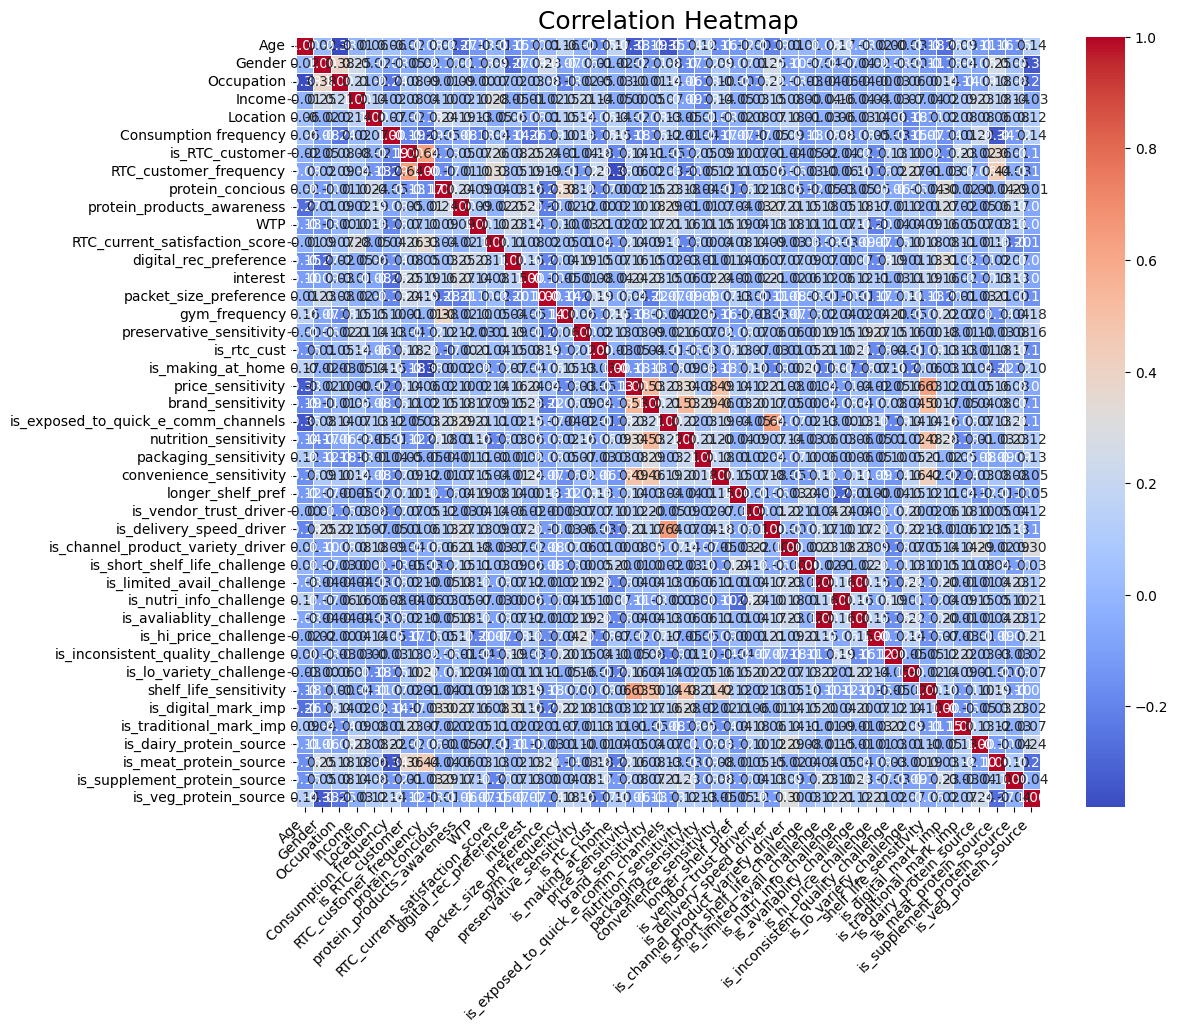

In [177]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = cleaned_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Add title and labels
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

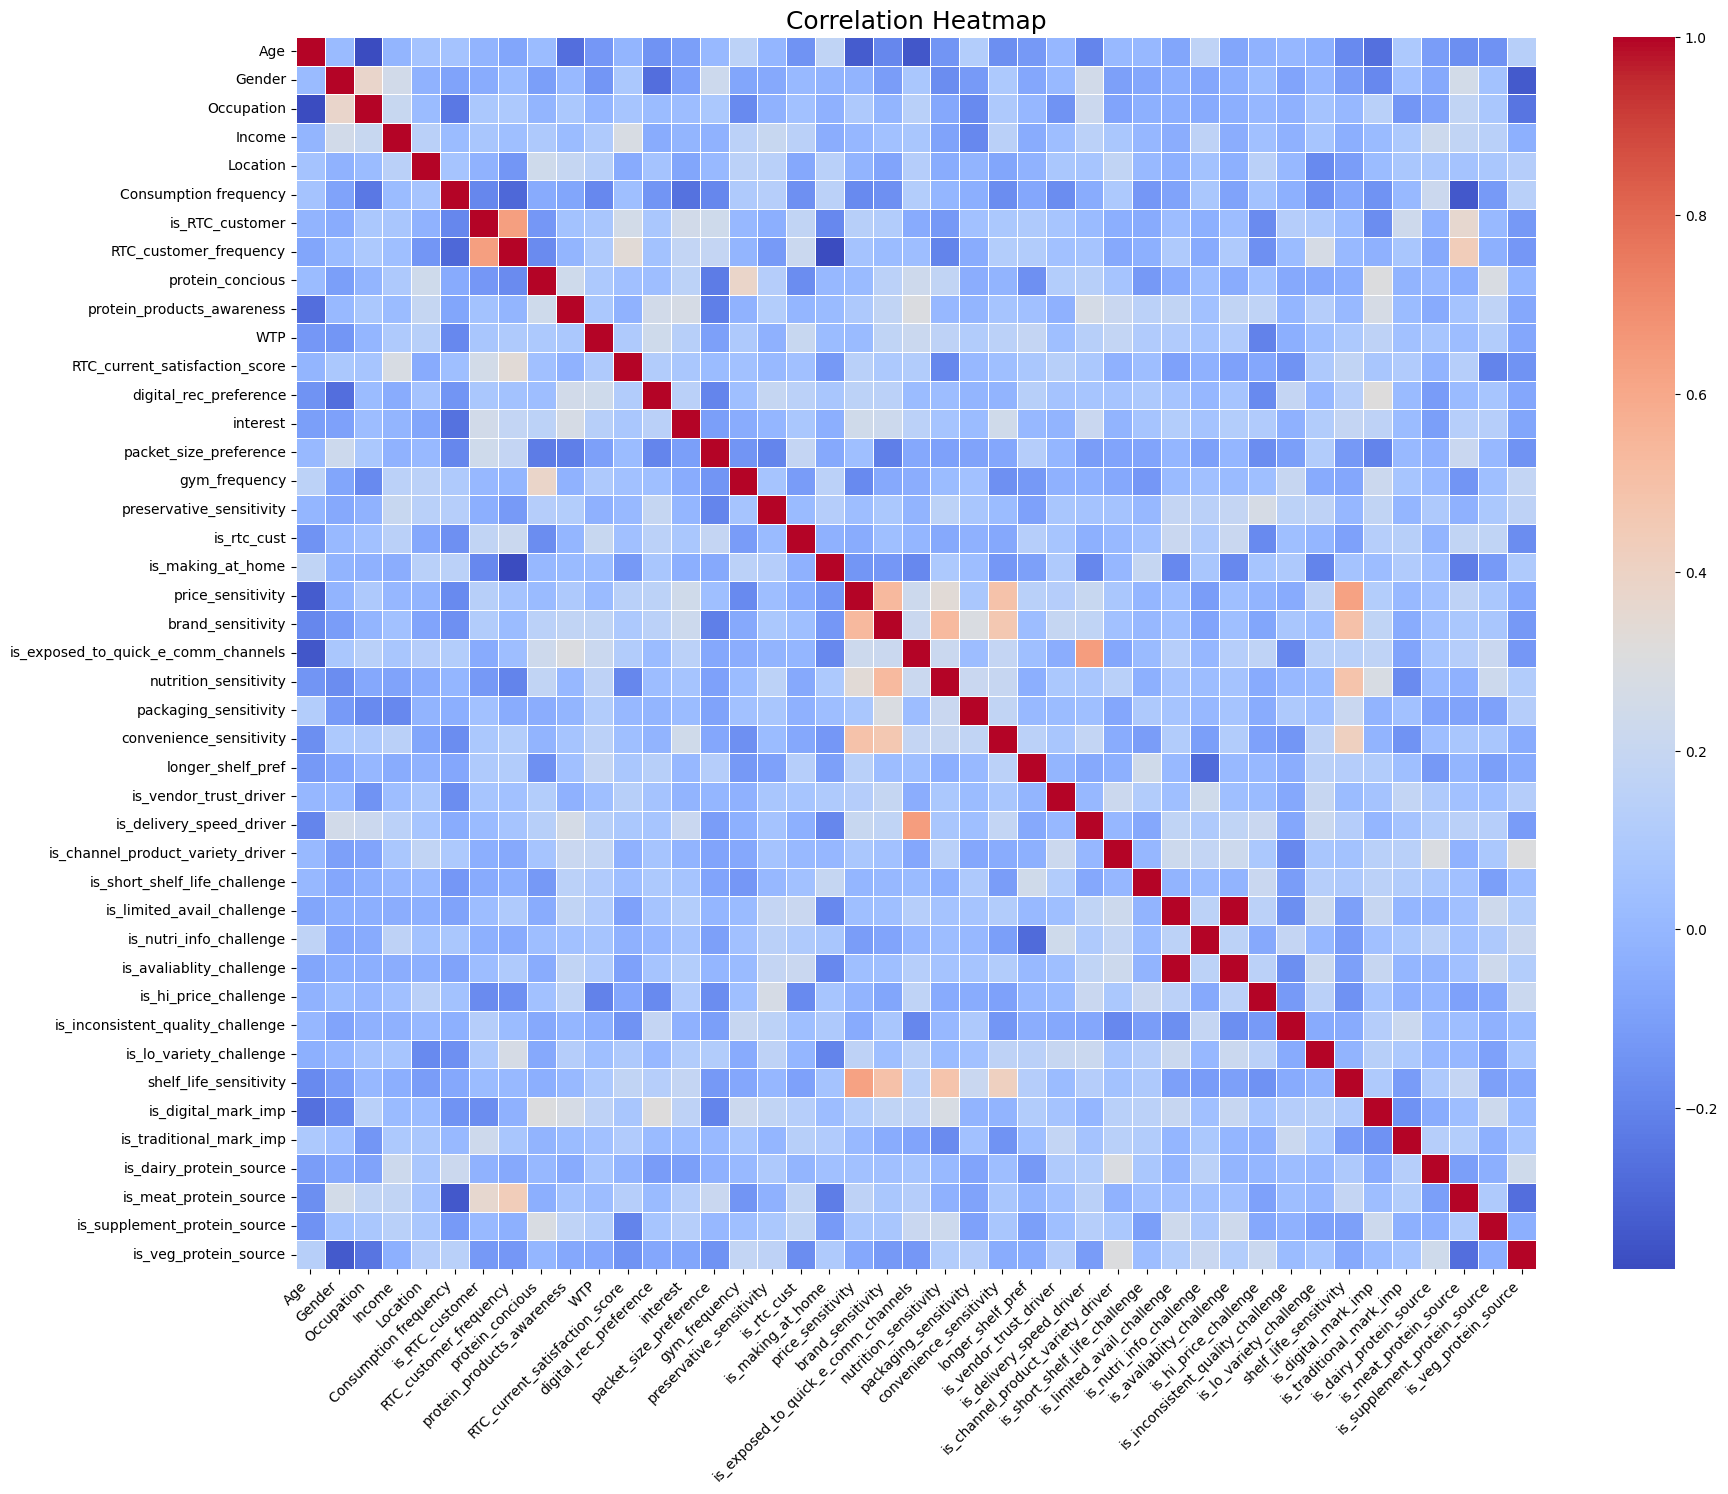

In [178]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = cleaned_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap without annotations
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)

# Add title and labels
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

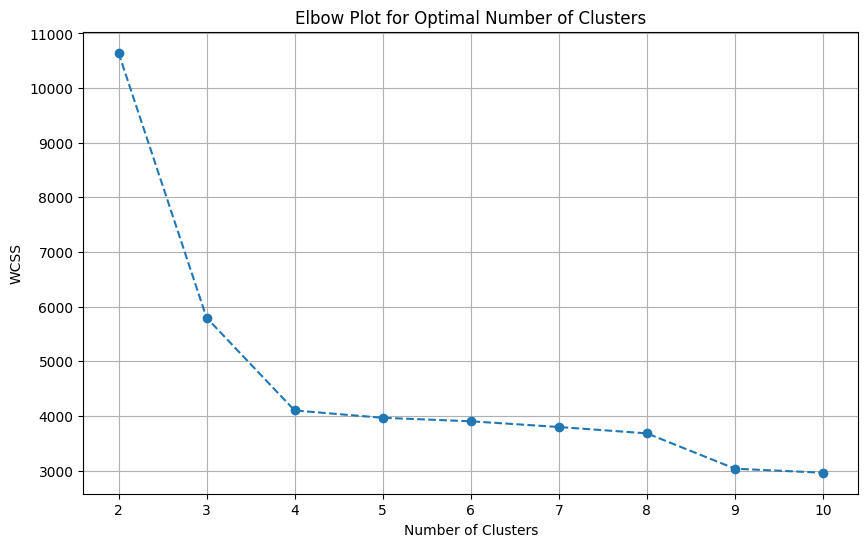

In [179]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(cleaned_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [183]:
import pandas as pd

# Fit the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cleaned_data['Cluster'] = kmeans.fit_predict(cleaned_data)

# Calculate the means and size of each feature under each cluster
cluster_means = cleaned_data.groupby('Cluster').mean()
cluster_sizes = cleaned_data['Cluster'].value_counts().sort_index()

# Create a dataframe with means and sizes
cluster_summary = cluster_means.T


In [189]:
cluster_sizes.values

array([26, 49, 12, 25], dtype=int64)

In [191]:
size_df = pd.DataFrame(columns=['Cluster', 'Size'])
size_df['Size'] = cluster_sizes.values
size_df['Cluster'] = [0,1,2,3]
size_df

,Cluster,Size
0,0,26
1,1,49
2,2,12
3,3,25


In [185]:
cluster_summary

Cluster,0,1,2,3
Age,2.000000,2.122449,1.916667,2.36
Gender,0.500000,0.693878,0.583333,0.72
Occupation,4.038462,4.469388,4.416667,4.16
Income,2.884615,3.020408,3.208333,2.68
Location,1.730769,1.653061,1.916667,1.56
Consumption frequency,2.807692,2.938776,2.500000,3.64
is_RTC_customer,0.673077,0.663265,0.666667,0.56
RTC_customer_frequency,1.423077,1.367347,1.416667,1.12
protein_concious,2.576923,2.530612,2.625000,2.32
protein_products_awareness,2.692308,2.897959,2.833333,2.20


### Regression Analysis

In [192]:
cleaned_data.head()

,Age,Gender,Occupation,Income,Location,Consumption frequency,is_RTC_customer,RTC_customer_frequency,protein_concious,protein_products_awareness,...,is_inconsistent_quality_challenge,is_lo_variety_challenge,shelf_life_sensitivity,is_digital_mark_imp,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source,Cluster
0,2,1,4,4.0,2,5,0.0,0.0,2.0,2,...,0,1,3,1,0,1,0,0,0,0
1,1,1,4,2.5,2,5,0.0,0.0,2.0,2,...,1,0,0,0,1,1,0,0,1,3
2,2,1,6,4.0,2,5,0.0,0.0,3.0,4,...,0,0,2,1,0,1,0,0,1,1
3,2,1,4,3.0,2,2,1.0,2.0,2.5,2,...,0,0,3,1,1,0,1,1,0,2
4,2,1,4,2.5,1,3,1.0,3.0,1.0,3,...,1,1,1,0,1,0,1,0,0,1
